In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,auc

In [2]:
train_df = pd.read_csv('dataset3.csv')
test_df = pd.read_csv('dataset3test.csv')

In [3]:
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
train_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [6]:
Churn = {'Yes': 1,'No': 0} 
  
# traversing through dataframe 
# values where key matches 
train_df.Churn = [Churn[item] for item in train_df.Churn] 
train_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


Checking for any missing values

In [7]:
print("Any missing sample in training set:",train_df.isnull().values.any())

Any missing sample in training set: True


In [8]:
train_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [9]:
train_df['MonthlyRevenue'] = train_df['MonthlyRevenue'].replace(np.nan, train_df['MonthlyRevenue'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [10]:
train_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue                 0
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [11]:
train_df['MonthlyMinutes'] = train_df['MonthlyMinutes'].replace(np.nan, train_df['MonthlyMinutes'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.000000,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,525.653416,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,525.653416,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [12]:
train_df['TotalRecurringCharge'] = train_df['TotalRecurringCharge'].replace(np.nan, train_df['TotalRecurringCharge'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.000000,85.000000,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,525.653416,46.830088,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,525.653416,46.830088,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [13]:
train_df['OverageMinutes'] = train_df['OverageMinutes'].replace(np.nan, train_df['OverageMinutes'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.25,0.000000,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.00,0.000000,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.00,0.000000,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.24,0.000000,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.00,0.000000,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,NaN,40.027785,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.000000,85.000000,0.99,45.000000,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,525.653416,46.830088,NaN,40.027785,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,525.653416,46.830088,NaN,40.027785,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [14]:
train_df['DirectorAssistedCalls'] = train_df['DirectorAssistedCalls'].replace(np.nan, train_df['DirectorAssistedCalls'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [15]:
train_df['RoamingCalls'] = train_df['RoamingCalls'].replace(np.nan, train_df['RoamingCalls'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [16]:
train_df['PercChangeMinutes'] = train_df['PercChangeMinutes'].replace(np.nan, train_df['PercChangeMinutes'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [17]:
train_df['PercChangeRevenues'] = train_df['PercChangeRevenues'].replace(np.nan, train_df['PercChangeRevenues'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [18]:
train_df.drop(train_df[train_df['ServiceArea'].isnull()].index, inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51018,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51019,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51020,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51021,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [19]:
train_df.drop(train_df[train_df['Handsets'].isnull()].index, inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [20]:
train_df.drop(train_df[train_df['HandsetModels'].isnull()].index, inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [21]:
train_df['AgeHH1'] = train_df['AgeHH1'].replace(np.nan, train_df['AgeHH1'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [22]:
train_df['AgeHH2'] = train_df['AgeHH2'].replace(np.nan, train_df['AgeHH2'].mean())
train_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [23]:
train_df.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [24]:
train_df = train_df.drop('CustomerID',axis=1)
train_df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [25]:
train_df.dtypes

Churn                          int64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                     float64
H

**Box Plot to see Numeric Column Data**

In [26]:
#Extract the numerical features from the dataset
num_var = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']


In [27]:
for i in train_df.columns:
  if train_df[i].dtypes=='object':
    print(f'{i} : {train_df[i].unique()}')

ServiceArea : ['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'NNYROC716' 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602'
 'NNYBUF716' 'DETTOL419' 'NNYSYR315' 'STLSTL314' 'PHIPHI215' 'SEABLV425'
 'MIAMIA305' 'PHICHC215' 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'LOUNAL812'
 'MIADEL561' 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'SFRSAC916' 'MIANDA305'
 'MINSTP612' 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561'
 'SEAOLY360' 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201'
 'SFRPAL650' 'DETDET313' 'DETROS810' 'NYCNEW908' 'NYCNAS516' 'NSHCOL615'
 'PITGRE412' 'SEABEA503' 'NYCSUF516' 

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [29]:
train_df = FunLabelEncoder(train_df)
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51022 entries, 0 to 51021
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51022 non-null  int64  
 1   MonthlyRevenue             51022 non-null  float64
 2   MonthlyMinutes             51022 non-null  float64
 3   TotalRecurringCharge       51022 non-null  float64
 4   DirectorAssistedCalls      51022 non-null  float64
 5   OverageMinutes             51022 non-null  float64
 6   RoamingCalls               51022 non-null  float64
 7   PercChangeMinutes          51022 non-null  float64
 8   PercChangeRevenues         51022 non-null  float64
 9   DroppedCalls               51022 non-null  float64
 10  BlockedCalls               51022 non-null  float64
 11  UnansweredCalls            51022 non-null  float64
 12  CustomerCareCalls          51022 non-null  float64
 13  ThreewayCalls              51022 non-null  flo

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,...,0,4,0,0,8,1,0,2,4,0
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,...,0,5,0,0,8,0,3,2,4,2
2,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,...,0,6,0,0,15,0,2,3,1,2
3,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,...,0,6,0,0,0,0,3,0,3,0
4,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,...,0,9,0,1,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,...,0,6,0,0,13,0,0,2,3,2
51018,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,...,0,9,0,1,13,0,2,0,3,0
51019,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,...,0,7,0,1,14,0,4,0,0,0
51020,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,...,0,9,0,0,8,0,4,0,3,0


In [30]:
train_outcome = pd.crosstab(index=train_df["Churn"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Churn,
0,36323
1,14699


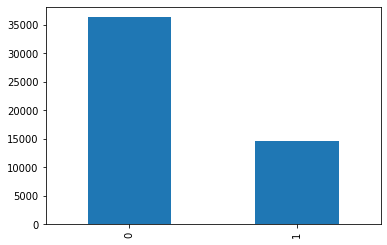

In [31]:
train_df.Churn.value_counts()[0:30].plot(kind='bar')
plt.show()

In [32]:
scaler = preprocessing.MinMaxScaler()
names = train_df.columns
d = scaler.fit_transform(train_df)
scaled_df = pd.DataFrame(d, columns=names)


#from sklearn.model_selection import train_test_split
#Y = scaled_df['Churn']
#X = scaled_df.drop(columns=['Churn'])
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [33]:
scaled_df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1.0,0.024537,0.029759,0.080292,0.001568,0.000000,0.000000,0.410058,0.303158,0.003157,...,0.0,0.444444,0.0,0.00,0.533333,1.0,0.000000,0.666667,0.571429,0.0
1,1.0,0.018836,0.001359,0.068127,0.000000,0.000000,0.000000,0.426933,0.308448,0.001353,...,0.0,0.555556,0.0,0.00,0.533333,0.0,0.500000,0.666667,0.571429,1.0
2,0.0,0.035924,0.001087,0.119221,0.000000,0.000000,0.000000,0.427153,0.308448,0.000000,...,0.0,0.666667,0.0,0.00,1.000000,0.0,0.333333,1.000000,0.142857,1.0
3,0.0,0.071937,0.178285,0.209246,0.007780,0.000000,0.000000,0.444690,0.310704,0.234551,...,0.0,0.666667,0.0,0.00,0.000000,0.0,0.500000,0.000000,0.428571,0.0
4,1.0,0.018958,0.000000,0.068127,0.000000,0.000000,0.000000,0.427374,0.308393,0.000000,...,0.0,1.000000,0.0,0.04,0.000000,0.0,0.000000,0.000000,0.571429,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,1.0,0.052869,0.071430,0.140706,0.005617,0.009264,0.001111,0.426100,0.308117,0.041949,...,0.0,0.666667,0.0,0.00,0.866667,0.0,0.000000,0.666667,0.428571,1.0
51018,0.0,0.082420,0.237125,0.233577,0.006211,0.010414,0.004225,0.440829,0.312876,0.075327,...,0.0,1.000000,0.0,0.04,0.866667,0.0,0.333333,0.000000,0.428571,0.0
51019,1.0,0.052869,0.071430,0.140706,0.005617,0.009264,0.001111,0.426100,0.308117,0.323410,...,0.0,0.777778,0.0,0.04,0.933333,0.0,0.666667,0.000000,0.000000,0.0
51020,0.0,0.052869,0.071430,0.140706,0.005617,0.009264,0.001111,0.426100,0.308117,0.000000,...,0.0,1.000000,0.0,0.00,0.533333,0.0,0.666667,0.000000,0.428571,0.0


c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Feature 0: inf
Feature 1: 6.957921
Feature 2: 86.249579
Feature 3: 123.860060
Feature 4: 13.536887
Feature 5: 6.251453
Feature 6: 1.398807
Feature 7: 50.308021
Feature 8: 3.617059
Feature 9: 7.225903
Feature 10: 1.104041
Feature 11: 31.491102
Feature 12: 34.292382
Feature 13: 17.324285
Feature 14: 48.282022
Feature 15: 31.541141
Feature 16: 35.323508
Feature 17: 55.281826
Feature 18: 55.869224
Feature 19: 5.824173
Feature 20: 0.054253
Feature 21: 22.602267
Feature 22: 9.109257
Feature 23: 69.978374
Feature 24: 13.810419
Feature 25: 0.053998
Feature 26: 38.106817
Feature 27: 50.911855
Feature 28: 366.439471
Feature 29: 31.351925
Feature 30: 14.320415
Feature 31: 3.240509
Feature 32: 23.442398
Feature 33: 143.266154
Feature 34: 1.072620
Feature 35: 0.824893
Feature 36: 9.251637
Feature 37: 20.267137
Feature 38: 23.356515
Feature 39: 0.694321
Feature 40: 2.165947
Feature 41: 0.874222
Feature 42: 4.848662
Feature 43: 138.123013
Feature 44: 40.248565
Feature 45: 4.368438
Feature 46: 1.38812

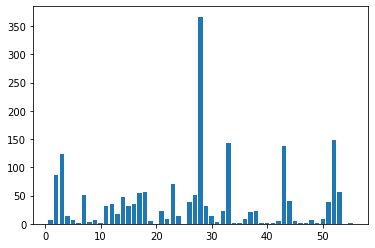

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k=20)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
l = len(scaled_df.columns.values)
l = l - 1
X = scaled_df.iloc[:,0:l]
y = scaled_df.Churn
# # split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
sum=0
for i in range(len(fs.scores_)):
    if i!=0:
      sum+=fs.scores_[i]
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [35]:
score = []
score = fs.scores_
selected_feature = []
i = 0
while i<len(score):
    if score[i] > 30:
        selected_feature.append(i)
    i = i+1
print("These Feature Has been Selected: ",selected_feature)
print()
print("Getting indexes the Actual Data Columns:")
print()
i = 0
while i<len(train_df.columns):
    print("Index: ",i," ",train_df.columns[i])
    i = i+1

These Feature Has been Selected:  [0, 2, 3, 7, 11, 12, 14, 15, 16, 17, 18, 23, 26, 27, 28, 29, 33, 43, 44, 51, 52, 53]

Getting indexes the Actual Data Columns:

Index:  0   Churn
Index:  1   MonthlyRevenue
Index:  2   MonthlyMinutes
Index:  3   TotalRecurringCharge
Index:  4   DirectorAssistedCalls
Index:  5   OverageMinutes
Index:  6   RoamingCalls
Index:  7   PercChangeMinutes
Index:  8   PercChangeRevenues
Index:  9   DroppedCalls
Index:  10   BlockedCalls
Index:  11   UnansweredCalls
Index:  12   CustomerCareCalls
Index:  13   ThreewayCalls
Index:  14   ReceivedCalls
Index:  15   OutboundCalls
Index:  16   InboundCalls
Index:  17   PeakCallsInOut
Index:  18   OffPeakCallsInOut
Index:  19   DroppedBlockedCalls
Index:  20   CallForwardingCalls
Index:  21   CallWaitingCalls
Index:  22   MonthsInService
Index:  23   UniqueSubs
Index:  24   ActiveSubs
Index:  25   ServiceArea
Index:  26   Handsets
Index:  27   HandsetModels
Index:  28   CurrentEquipmentDays
Index:  29   AgeHH1
Index:  

In [36]:
scaler = preprocessing.MinMaxScaler()
names = train_df.columns
d = scaler.fit_transform(train_df)
scaled_df = pd.DataFrame(d, columns=names)

In [37]:
data = scaled_df[['MonthlyMinutes','TotalRecurringCharge','PercChangeMinutes','UnansweredCalls',
                  'CustomerCareCalls','ReceivedCalls','OutboundCalls','InboundCalls',
                  'PeakCallsInOut','OffPeakCallsInOut','UniqueSubs','Handsets',
                  'HandsetModels','CurrentEquipmentDays','AgeHH1','HandsetWebCapable',
                  'RetentionCalls','RetentionOffersAccepted','HandsetPrice',
                  'MadeCallToRetentionTeam','CreditRating','Churn']]

In [38]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#Random Forest without SMOTE

In [40]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=10,max_features=10,max_leaf_nodes=35,random_state=9)

# We train model
rfcla.fit(X_train,y_train)

# We predict target values
Y_predict_rfcla = rfcla.predict(X_test)

In [41]:
score_rfcla = rfcla.score(X_test, y_test)
print(score_rfcla)

0.719147167121986


In [42]:
cnf_matrix_rfcla = confusion_matrix(y_test,Y_predict_rfcla)
cnf_matrix_rfcla

array([[11928,   118],
       [ 4611,   181]], dtype=int64)

In [43]:
def print_metrics(cm):
  TP  = cm[1][1]
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  precision = TP/(TP+FP) 
  recall = TP/(TP+FN)
  f1score = (2*precision*recall)/(precision+recall)
  print("Accuracy(%):",accuracy*100)
  print("Precision(%): ",precision*100)
  print("Recall(%): ",recall*100)
  print("F1 score: ",f1score*100)

In [44]:
print_metrics(cnf_matrix_rfcla)

Accuracy(%): 71.9147167121986
Precision(%):  60.535117056856194
Recall(%):  3.777128547579299
F1 score:  7.110587310940876


#Logistic Regression without SMOTE

In [45]:
logistic_reg = LogisticRegression(penalty = 'l1',solver='liblinear',random_state = 1)
logistic_reg.fit(X_train,y_train)
lr_pred = logistic_reg.predict(X_test)
logistic_reg.score(X_test,y_test)

0.7151086827414183

In [46]:
cnf_lr = confusion_matrix(y_test,lr_pred)
cnf_lr

array([[11931,   115],
       [ 4682,   110]], dtype=int64)

In [47]:
print_metrics(cnf_lr)

Accuracy(%): 71.51086827414183
Precision(%):  48.888888888888886
Recall(%):  2.2954924874791316
F1 score:  4.385090691648395


#Decision Tree without SMOTE

In [48]:
decision_tree = DecisionTreeClassifier(max_features=15,max_leaf_nodes=25,random_state=1)
decision_tree.fit(X_train,y_train)
ydt_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.7172467038840717

In [49]:
cnf_dt = confusion_matrix(y_test,ydt_pred)
cnf_dt

array([[11774,   272],
       [ 4489,   303]], dtype=int64)

In [50]:
print_metrics(cnf_dt)

Accuracy(%): 71.72467038840718
Precision(%):  52.69565217391305
Recall(%):  6.323038397328881
F1 score:  11.291224147568473


#Naive Bayes without SMOTE

In [51]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train.ravel())
y_pred_nb = model_nb.predict(X_test)
model_nb.score(X_test,y_test)

0.6829789761254306

In [52]:
cnf_nb = confusion_matrix(y_test,y_pred_nb)
cnf_nb

array([[10589,  1457],
       [ 3881,   911]], dtype=int64)

In [53]:
print_metrics(cnf_nb)

Accuracy(%): 68.29789761254305
Precision(%):  38.47128378378378
Recall(%):  19.01085141903172
F1 score:  25.446927374301676


#Adaboost without SMOTE

In [54]:
model_ada = AdaBoostClassifier(learning_rate= 0.4,n_estimators= 17,random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
model_ada.score(X_test,y_test)

0.7187908302648771

In [55]:
cnf_ada = confusion_matrix(y_test,y_pred_nb)
cnf_ada

array([[10589,  1457],
       [ 3881,   911]], dtype=int64)

In [56]:
print_metrics(cnf_ada)

Accuracy(%): 68.29789761254305
Precision(%):  38.47128378378378
Recall(%):  19.01085141903172
F1 score:  25.446927374301676


#Multi layer perceptron without SMOTE

In [57]:
model_multi = MLPClassifier(solver='adam',hidden_layer_sizes=(50,))
model_multi.fit(X_train,y_train)
y_pred_multi = model_multi.predict(X_test)
model_multi.score(X_test,y_test)

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7147523458843092

In [58]:
cnf_multi = confusion_matrix(y_test,y_pred_multi)
cnf_multi

array([[11846,   200],
       [ 4603,   189]], dtype=int64)

In [59]:
print_metrics(cnf_multi)

Accuracy(%): 71.47523458843092
Precision(%):  48.58611825192802
Recall(%):  3.9440734557595993
F1 score:  7.295888824551246


#**Applying SMOTE**

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("before smote: ",Counter(y))
smote=SMOTE(random_state=0)
X_smote,y_smote = smote.fit_resample(X,y)
print("after smote:  ",Counter(y_smote))

before smote:  Counter({0.0: 36323, 1.0: 14699})
after smote:   Counter({1.0: 36323, 0.0: 36323})


In [61]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, random_state=1, test_size=0.33)

#Random Forest with SMOTE

In [62]:
model_rfcla_smote = RandomForestClassifier(n_estimators=25,max_features=20,max_leaf_nodes=45,random_state=42)
model_rfcla_smote.fit(X_train_smote, y_train_smote)
pred_rfcla_smote = model_rfcla_smote.predict(X_test_smote)
model_rfcla_smote.score(X_test_smote,y_test_smote)

0.7002586134979562

In [63]:
cnf_rfcla_smote = confusion_matrix(y_test_smote,pred_rfcla_smote)
cnf_rfcla_smote

array([[10307,  1700],
       [ 5486,  6481]], dtype=int64)

In [64]:
print_metrics(cnf_rfcla_smote)

Accuracy(%): 70.02586134979562
Precision(%):  79.22014423664588
Recall(%):  54.15726581432272
F1 score:  64.33392892594799


#Logistic Regression with SMOTE

In [65]:
logistic_reg_smote = LogisticRegression(penalty = 'l1',solver='liblinear',random_state = 1)
logistic_reg_smote.fit(X_train_smote,y_train_smote)
lr_pred_smote = logistic_reg_smote.predict(X_test_smote)
logistic_reg_smote.score(X_test_smote,y_test_smote)

0.5707015933928422

In [66]:
cnf_logistic_smote = confusion_matrix(y_test_smote,lr_pred_smote)
cnf_logistic_smote

array([[7265, 4742],
       [5550, 6417]], dtype=int64)

In [67]:
print_metrics(cnf_logistic_smote)

Accuracy(%): 57.070159339284224
Precision(%):  57.505152791468774
Recall(%):  53.62246176986714
F1 score:  55.49597855227882


#Naive Bayes with SMOTE

In [68]:
model_nb_smote = GaussianNB()
model_nb_smote.fit(X_train_smote, y_train_smote.ravel())
y_pred_nb_smote = model_nb_smote.predict(X_test_smote)
model_nb_smote.score(X_test_smote,y_test_smote)

0.5558104613331109

In [69]:
cnf_nb_smote = confusion_matrix(y_test_smote,y_pred_nb_smote)
cnf_nb_smote

array([[7553, 4454],
       [6195, 5772]], dtype=int64)

In [70]:
print_metrics(cnf_nb_smote) 

Accuracy(%): 55.581046133311084
Precision(%):  56.44435752004694
Recall(%):  48.232639759338184
F1 score:  52.01640156806201


#Decision Tree with SMOTE

In [71]:
decision_tree_smote = DecisionTreeClassifier(max_features=10,max_leaf_nodes=35,random_state=1)
decision_tree_smote.fit(X_train_smote,y_train_smote)
ydt_pred_smote = decision_tree_smote.predict(X_test_smote)
decision_tree_smote.score(X_test_smote,y_test_smote)

0.6444481521648453

In [72]:
cnf_dt_smote = confusion_matrix(y_test_smote,ydt_pred_smote)
cnf_dt_smote

array([[8083, 3924],
       [4600, 7367]], dtype=int64)

In [73]:
print_metrics(cnf_dt_smote)

Accuracy(%): 64.44481521648453
Precision(%):  65.24665662917369
Recall(%):  61.560959304754746
F1 score:  63.35024507696277


#Adaboost with SMOTE

In [74]:
model_ada_smote = AdaBoostClassifier(learning_rate= 1,n_estimators= 50,random_state=42)
model_ada_smote.fit(X_train_smote, y_train_smote)
y_pred_ada_smote = model_ada_smote.predict(X_test_smote)
model_ada_smote.score(X_test_smote,y_test_smote)

0.679944940352048

In [75]:
cnf_ada_smote = confusion_matrix(y_test_smote,y_pred_ada_smote)
cnf_ada_smote

array([[9675, 2332],
       [5341, 6626]], dtype=int64)

In [76]:
print_metrics(cnf_ada_smote)

Accuracy(%): 67.9944940352048
Precision(%):  73.96740343826747
Recall(%):  55.368931227542404
F1 score:  63.330943847072874


#Multi layer perceptron with SMOTE

In [77]:
model_multi_smote = MLPClassifier(solver='adam',hidden_layer_sizes=(30,))
model_multi_smote.fit(X_train_smote,y_train_smote)
y_pred_multi_smote = model_multi_smote.predict(X_test_smote)
model_multi_smote.score(X_test_smote,y_test_smote)

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6071577542337532

In [78]:
cnf_multi_smote = confusion_matrix(y_test_smote,y_pred_multi_smote)
cnf_multi_smote

array([[6406, 5601],
       [3817, 8150]], dtype=int64)

In [79]:
print_metrics(cnf_multi_smote)

Accuracy(%): 60.71577542337532
Precision(%):  59.26841684241146
Recall(%):  68.10395253614105
F1 score:  63.37973403841668


#ROC Curve

C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_22548\3594840882.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_22548\3594840882.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_22548\3594840882.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\U

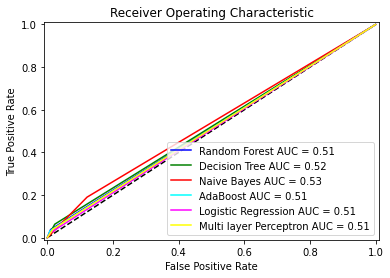

C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_22548\3594840882.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_22548\3594840882.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_22548\3594840882.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\U

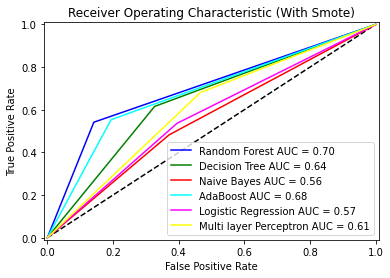

In [80]:

models = [
          "Random Forest",
          "Decision Tree",
          "Naive Bayes",
          "AdaBoost",
          "Logistic Regression",
          "Multi layer Perceptron"
]
preds=[
       Y_predict_rfcla,
       ydt_pred,
       y_pred_nb,
       y_pred_ada,
       lr_pred,
       y_pred_multi
]

preds2 =[
    pred_rfcla_smote,
    ydt_pred_smote,
    y_pred_nb_smote,
    y_pred_ada_smote,
    lr_pred_smote,
    y_pred_multi_smote
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black'
]
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, preds[i], models[i])
    
plt.show()

plt.title('Receiver Operating Characteristic (With Smote)')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for i,model in list(enumerate(models)):
  plot_roc_curves(y_test_smote,preds2[i],models[i])
plt.show()